# Sentiment Analysis on IMDB Movie Reviews

Work individually on this notebook.

Submitted by: 


**Prompt:**

> Describe the IMDB dataset.

Response:

Certainly! The IMDb (Internet Movie Database) dataset is a collection of data related to films, television shows, video games, and digital streaming content. It's one of the most comprehensive databases of its kind and contains various types of information. Here's a detailed description:

Title Basics: This includes details about movies, TV shows, and episodes. Key fields in this dataset are:

tconst: A unique identifier for each title.

titleType: The format of the title (e.g., movie, TV series, TV episode).

primaryTitle: The primary name/title of the item.

originalTitle: The original name/title of the item (often in the native language).

startYear: The release or premiere year.

endYear: The end year (applicable for TV series).

runtimeMinutes: Duration of the title.

genres: A list of genres associated with the title.

Name Basics: This dataset contains information about the crew and cast members, such as:

nconst: A unique identifier for each person.

primaryName: The name of the person.

birthYear and deathYear: Self-explanatory.

primaryProfession: Main professions of the person (e.g., actor, director).

knownForTitles: Titles the person is best known for.

Title Ratings: This dataset provides average ratings and the number of votes for each title. Key fields include:

tconst: Identifier for the title.

averageRating: The average rating of the title.

numVotes: The number of votes the title has received.

Title Crew: This dataset lists the directors and writers for each title.

tconst: Identifier for the title.

directors: IDs of directors associated with the title.

writers: IDs of writers associated with the title.

Title Episode: This is specifically for TV series and episodes, providing a relationship between them.

tconst: Identifier for the episode.

parentTconst: Identifier for the parent TV series.

seasonNumber and episodeNumber: Self-explanatory.

Title Principals: This dataset provides information about the main crew and cast for each title.

tconst: Identifier for the title.

ordering: A number to order the cast/crew.

nconst: Identifier for the person (cast/crew).

category: The profession of the person (e.g., actor, director).

job: Specific job title if applicable.

characters: Name of the character played by the actor.

The IMDb dataset is often used in various data analysis, machine learning, and recommendation system projects due to its rich set of information about 
the entertainment industry. It's important to note that while IMDb provides some datasets for free under a non-commercial license, not all IMDb data is freely available, and usage might be subject to certain terms and conditions.

**Prompt:**

> Write the python code to import the IMDB dataset.

Note that Copilot might not include all the necessry dependent packages. You 
may have to add them manually.

Also, if it's a package you don't have in your environment yet, you can open
the integrated terminal window, make sure to activate the same environment, 
and then install the package.

**Response:**


In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.datasets import imdb

# Load the dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

print("Training data:", len(train_data))
print("Test data:", len(test_data))


2023-10-12 18:03:32.520893: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-12 18:03:32.524230: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-12 18:03:32.582969: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-12 18:03:32.583031: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-12 18:03:32.583066: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

Training data: 25000
Test data: 25000


You might want to ask some questions about the dataset. For example, you might ask:

> what are the labels for the imdb dataset?

> what is the form of the training data?

> what are the words used in the training data?

For the last prompt, I got example python code, which also duplicated the
dataset loading, so I just deleted the duplicate code.

Note that the dataset is already processed, so the records are lists of integers.


The IMDb dataset from TensorFlow's Keras API consists of movie reviews labeled as positive or negative. Here are the answers to your questions:

Labels for the IMDb dataset:

The labels are binary:
0 represents a negative review.
1 represents a positive review.

Form of the training data:
The training data consists of a list of reviews.
Each review is a list of integers, where each integer represents a specific word in a fixed dictionary.
The length of the lists (reviews) can vary since different reviews have different lengths.

Words used in the training data:
The words in the training data are mapped to integers. The most frequent word is mapped to the number 1, the second most frequent word to 2, and so on.
You can retrieve the word-to-integer mapping using the get_word_index function from the imdb module. To get the actual words from the encoded reviews, you'll need to reverse this mapping.

Here's a Python code snippet that demonstrates how to retrieve the word-to-integer mapping and its reverse:

In [2]:


# Get the word-to-integer mapping
word_to_id = imdb.get_word_index()

# Reverse the mapping to get the integer-to-word mapping
id_to_word = {i: word for word, i in word_to_id.items()}

# For demonstration, decode the first review in the training data
decoded_review = ' '.join([id_to_word.get(i - 3, '?') for i in train_data[0]])  # Subtracting 3 because 0, 1, and 2 are reserved indices for "padding", "start of sequence", and "unknown".
print(decoded_review)


? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

Now let understand the word index a little bit more. Try a prompt like:

> What's a good way to visualize the word index?


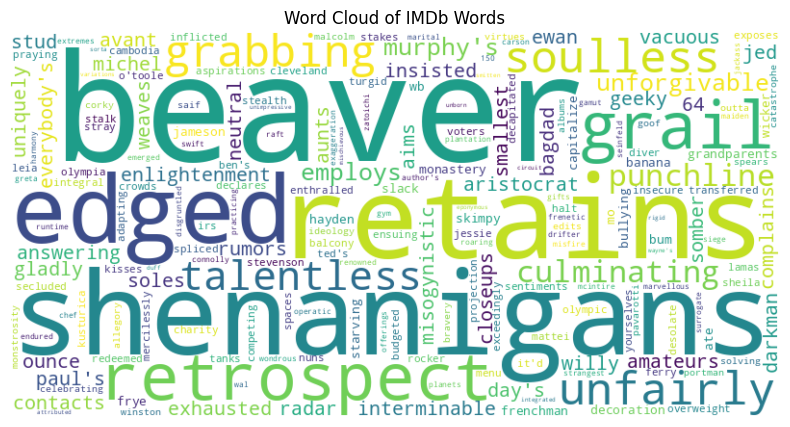

In [3]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies({word: freq for word, freq in word_to_id.items() if freq < 10000})  # considering top 10,000 words

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of IMDb Words')
plt.show()


**Prompt:**

> How do you create a word cloud from the word index, where the font size is proportional to the number of occurences of the word?

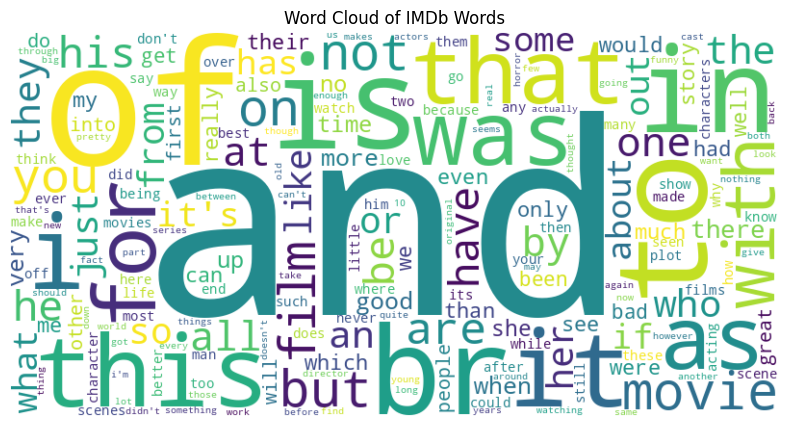

In [4]:
# Create a frequency dictionary from train_data
word_count = {}
for review in train_data:
    for word_index in review:
        word = id_to_word.get(word_index, '?')  # Retrieve the word from its index
        word_count[word] = word_count.get(word, 0) + 1  # Increment the count for the word

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_count)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of IMDb Words')
plt.show()


It's clear that the most common words are ones that are not in the word index
(represented by '?') and stop words. So, let's remove those and try again.

> Remove stop words and punctuation

Note that here again, Copilot didn't include the necessary packages, so I had
to add them manually, as well as download the stop words. I just requested that
with the promp:

> download the stop words

In [5]:
import string
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Download the stopwords if not already done
import nltk
nltk.download('stopwords')

# Get the list of English stop words
stop_words = set(stopwords.words('english'))

# Create a frequency dictionary from train_data
word_count = {}
for review in train_data:
    for word_index in review:
        word = id_to_word.get(word_index, '').lower()  # Retrieve the word from its index and convert to lowercase
        
        # Skip stop words and punctuation
        if word in stop_words or word in string.punctuation:
            continue
        
        word_count[word] = word_count.get(word, 0) + 1  # Increment the count for the word

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_count)


[nltk_data] Downloading package stopwords to
[nltk_data]     /usr4/ds549/saisurya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


> now created a word cloud from the filtered words

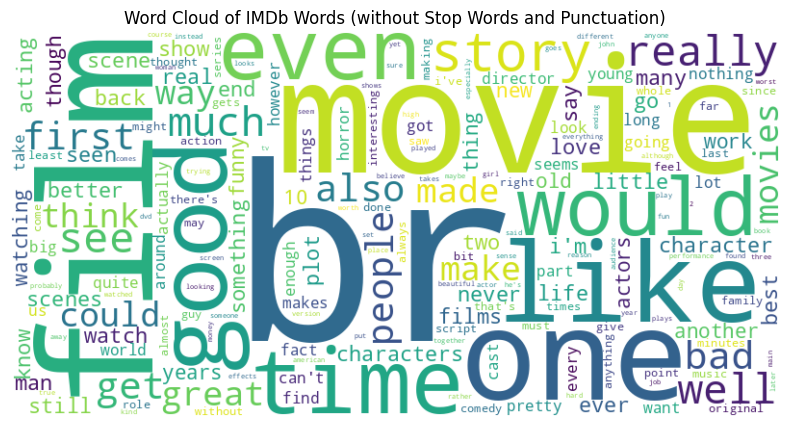

In [19]:
# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of IMDb Words (without Stop Words and Punctuation)')
plt.show()


Ok, so hopefully we understand the dataset enough to know that it is basically
a binary classifier. So, let's prompt to define, train and evaluate a model.

> write a classifer for the imdb dataset

In [20]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

# Load the dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# Preprocess the data: Padding sequences
maxlen = 100  # Maximum length of a review
train_data = pad_sequences(train_data, maxlen=maxlen)
test_data = pad_sequences(test_data, maxlen=maxlen)

# Define the model
model = Sequential()
model.add(Embedding(10000, 16, input_length=maxlen))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_data, train_labels, epochs=4, batch_size=512, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_data, test_labels)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")


Epoch 1/4
40/40 [==============================] - 2s 11ms/step - loss: 0.6877 - accuracy: 0.5607 - val_loss: 0.6685 - val_accuracy: 0.6684
Epoch 2/4
40/40 [==============================] - 0s 7ms/step - loss: 0.5643 - accuracy: 0.7835 - val_loss: 0.4535 - val_accuracy: 0.8064
Epoch 3/4
40/40 [==============================] - 0s 7ms/step - loss: 0.3346 - accuracy: 0.8714 - val_loss: 0.3537 - val_accuracy: 0.8422
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.3379 - accuracy: 0.8498
Test accuracy: 84.98%


We can inspect the code that was produced, but in addition we can ask Copilot to
expain it for us by putting the cursor in the code cell above and either 
typing "explain", or clicking in the Copilot chat box and typing `/explain`.

> /explain

import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

# Load the dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# Preprocess the data: Padding sequences
maxlen = 100  # Maximum length of a review
train_data = pad_sequences(train_data, maxlen=maxlen)
test_data = pad_sequences(test_data, maxlen=maxlen)

# Define the model
model = Sequential()
model.add(Embedding(10000, 16, input_length=maxlen))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_data, train_labels, epochs=4, batch_size=512, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_data, test_labels)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")


## Conclusion

We'll leave it there but you may want to explore further, perhaps with prompts
like

> What is the accuracy of the best-performing model on the IMDB dataset?

> What are some common deep learning models used for sentiment analysis on the IMDB dataset?

1. What is the accuracy of the best-performing model on the IMDB dataset?

The best-performing models on the IMDb dataset, as reported in various research papers, often achieve accuracies in the range of 90% to 95% or even higher. The exact accuracy can vary based on the model architecture, preprocessing techniques, and other factors. State-of-the-art models, especially those leveraging large-scale transformers like BERT or its variants, tend to achieve the higher end of this range.

2. What are some common deep learning models used for sentiment analysis on the IMDB dataset?

Several deep learning architectures have been applied to the IMDb dataset for sentiment analysis:

Recurrent Neural Networks (RNNs): They process sequences of data and can capture patterns over time or sequence. Long Short-Term Memory (LSTM) and Gated Recurrent Units (GRU) are popular RNN variants used for sentiment analysis.
Convolutional Neural Networks (CNNs): Although traditionally used for image processing, 1D CNNs can be applied to sequences of text data to capture local patterns or n-grams.
Word Embeddings: Techniques like Word2Vec or GloVe are used to convert words into dense vectors which capture semantic meaning. These embeddings can be used as the first layer in a neural network.
Transformer Architectures: Models like BERT, GPT-2, and RoBERTa leverage the transformer architecture, which uses self-attention mechanisms to weigh the importance of different words in a sequence relative to a given word. Fine-tuning such pre-trained models on the IMDb dataset often leads to state-of-the-art performance.
Hybrid Models: Combining different architectures, like using CNNs followed by LSTMs, to leverage the strengths of both.
Attention Mechanisms: Especially in RNN-based models, attention mechanisms allow the model to focus on specific parts of the input sequence when producing an output, which can be beneficial for sentiment analysis.
Regarding the training output you provided:

The model you trained achieved a test accuracy of approximately 84.98%. It's a decent score for a simple model. However, with more advanced architectures, optimizations, and techniques (like the ones mentioned above), the performance can be improved further.

## Extra Credit

Try to get Copilot to generate a model that achieves > 90% accuracy on the IMDB.